# Feature Exploration Continued
We will pick up where we left off with calculating features for a single subject in preparation for training an NN.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import os
import sys
# module = os.path.abspath('/home/learner/DLA_project/src/main')
module = os.path.abspath("C:/Users\\18145\\development\\wesad_experiments\\src\\main")
if module not in sys.path:
    sys.path.append(module)
from DataManager import DataManager

In [2]:
data = DataManager()
subject_three = data.load(3) # load subject two data in two dicts, baseline and stress

Loading data from S3
Path=C:\WESAD\S3\S3.pkl


In [3]:
# Let us take a quick look and make sure the Data module is doing what we want.
#print('baseline: ', subject_three[0], '\nstress: ', subject_three[1])

In [4]:
# Simplify the below exploration by extracting these entries into new variables
temp = subject_three[0]['Temp']
acc = subject_three[0]['ACC']
eda = subject_three[0]['EDA']

temp_stress = subject_three[1]['Temp']
acc_stress = subject_three[1]['ACC']
eda_stress = subject_three[1]['EDA']

In [5]:
print('number of temp values        = ', len(temp))
print('number of eda values         = ', len(eda))
print('number of acc values         = ', len(acc))

print('number of stress temp values = ', len(temp_stress))
print('number of stress eda values  = ', len(eda_stress))
print('number of stress acc values  = ', len(acc_stress))

print(len(acc_stress))

number of temp values        =  798000
number of eda values         =  798000
number of acc values         =  798000
number of stress temp values =  448000
number of stress eda values  =  448000
number of stress acc values  =  448000
448000


## ACC
Since we now know how to compute the features for both EDA and temperature, we will compute the features of interest for the accelerometer data.

The features of interest for the ACC data are as follows.

1. We are interested in computing mean and STD for each axis, summed over all the axes.
2. Peak frequency for each axis aka max.

In [6]:
# Recall:
#acc = subject_three[0]['ACC']
#acc_stress = subject_three[1]['ACC']

# DO THIS: https://stackoverflow.com/questions/32625939/ipython-notebook-where-is-jupyter-notebook-config-py-in-mac
# and this: https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-in-jupyter-notebook-when-viewing-image
# If you reach the IOPub data rate.

window_size = 42000
window_shift = 175
acc_features_base = data.get_features_for_acc(acc, window_size, window_shift)
acc_features_stress = data.get_features_for_acc(acc_stress, window_size, window_shift)

# print(acc_features)
# print(acc_features_stress)

There are  798000  samples being considered.
Computing  756000  feature values
with window size of  42000 .
There are  448000  samples being considered.
Computing  406000  feature values
with window size of  42000 .


In [7]:
print(type(data.BASELINE_DATA))
print(data.BASELINE_DATA)

<class 'list'>
[{'ACC': array([[ 0.78659999, -0.05980003,  0.50479996],
       [ 0.79100001, -0.06160003,  0.50479996],
       [ 0.79299998, -0.06260002,  0.50179994],
       ...,
       [ 0.85220003, -0.0194    , -0.3592    ],
       [ 0.85099995, -0.01980001, -0.3574    ],
       [ 0.85099995, -0.01899999, -0.35619998]]), 'EDA': array([[7.2227478 ],
       [7.22427368],
       [7.2227478 ],
       ...,
       [6.61582947],
       [6.62078857],
       [6.61735535]]), 'Temp': array([[32.989807],
       [33.030365],
       [33.04239 ],
       ...,
       [31.658417],
       [31.667297],
       [31.662842]], dtype=float32)}]


In [8]:
print('number of acc values mean          = ', len(acc_features_base['mean']))
print('number of stress acc values mean   = ', len(acc_features_stress['mean']))

print('number of acc avalues std           = ', len(acc_features_base['std']))
print('number of stress acc values std    = ', len(acc_features_stress['std']))

number of acc values mean          =  4320
number of stress acc values mean   =  2320
number of acc avalues std           =  4320
number of stress acc values std    =  2320


In [9]:
range_to_plot = range(100)

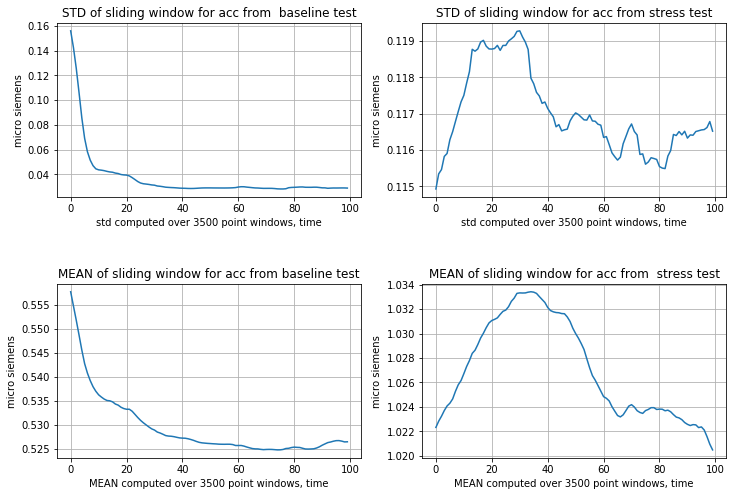

In [10]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)

ax221 = plt.subplot(2, 2, 1)
ax221.plot(list(range_to_plot), acc_features_base['std'][0:max(range_to_plot)+1])

ax221.set(xlabel='std computed over 3500 point windows, time', ylabel = 'micro siemens',
       title = 'STD of sliding window for acc from  baseline test')
ax221.grid()

ax222 = plt.subplot(2, 2, 2)
ax222.plot(list(range_to_plot), acc_features_stress['std'][0:max(range_to_plot)+1])

ax222.set(xlabel='std computed over 3500 point windows, time', ylabel = 'micro siemens',
        title = 'STD of sliding window for acc from stress test')
ax222.grid()


ax223 = plt.subplot(2, 2, 3)
ax223.plot(list(range_to_plot), acc_features_base['mean'][0:max(range_to_plot)+1])

ax223.set(xlabel='MEAN computed over 3500 point windows, time', ylabel = 'micro siemens',
        title = 'MEAN of sliding window for acc from baseline test')
ax223.grid()


ax224 = plt.subplot(2, 2, 4)
ax224.plot(list(range_to_plot), acc_features_stress['mean'][0:max(range_to_plot)+1])

ax224.set(xlabel='MEAN computed over 3500 point windows, time', ylabel = 'micro siemens',
       title = 'MEAN of sliding window for acc from  stress test')
ax224.grid()
plt.show()

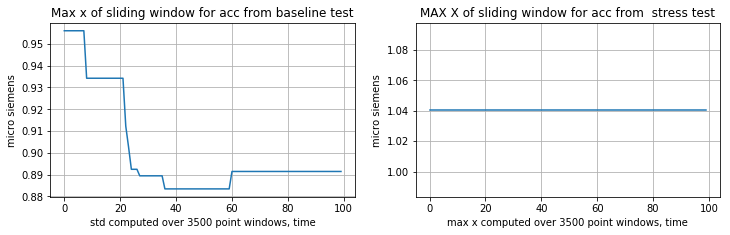

In [11]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)

ax223 = plt.subplot(2, 2, 3)
ax223.plot(list(range_to_plot), acc_features_base['maxx'][0:max(range_to_plot)+1])

ax223.set(xlabel='std computed over 3500 point windows, time', ylabel = 'micro siemens',
        title = 'Max x of sliding window for acc from baseline test')
ax223.grid()


ax224 = plt.subplot(2, 2, 4)
ax224.plot(list(range_to_plot), acc_features_stress['maxx'][0:max(range_to_plot)+1])

ax224.set(xlabel='max x computed over 3500 point windows, time', ylabel = 'micro siemens',
       title = 'MAX X of sliding window for acc from  stress test')
ax224.grid()
plt.show()